In [1]:
%%time
import numpy as np
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from astropy import constants as const 
from astropy.modeling.models import BlackBody
import sys
from tqdm import tqdm
import LeHaMoC_f as f # imports functions
import time

#######################
#tables# 
#######################
Phi_g_tab = pd.read_csv("Phi_g_K&A.txt", names=["eta_div_eta_0","s_g","d_g","B_g"], sep=" ",  skiprows=0)
Phi_el_tab = pd.read_csv("Phi_g_leptons_K&A.txt", names=["eta_div_eta_0","s_e+","d_e+","B_e+","s_anti_nu_mu","d_anti_nu_mu","B_anti_nu_mu","s_nu_mu","d_nu_mu","B_nu_mu","s_nu_e","d_nu_e","B_nu_e"], sep=" ",  skiprows=0)
Phi_el_1_tab = pd.read_csv("Phi_e-nu_e_K&A.txt", names=["eta_div_eta_0","s_e-","d_e-","B_e-","s_anti_nu_e","d_anti_nu_e","B_anti_nu_e"], sep=" ",  skiprows=0)
f_k_i = pd.read_csv('f(xi).csv',names=("k_i","fk_i"))
Cross_Section_pg = pd.read_csv('cross_section.csv',names=('Ph_En','C_S'))
kp_pg = pd.read_csv('kp_pg.txt',names=('e','k'),sep=" ")

#######################
#constants# 
#######################
G = (const.G).cgs.value       
c = (const.c).cgs.value     
Ro = (const.R_sun).cgs.value            
Mo = (const.M_sun).cgs.value       
yr = (u.yr).to(u.s)                
kpc = (u.kpc).to(u.cm)             
pc = (u.pc).to(u.cm)              
m_pr = (u.M_p).to(u.g)         
m_el = (u.M_e).to(u.g)         
kb = (const.k_B).cgs.value
h = (const.h).cgs.value 
q = (const.e.gauss).value                
sigmaT = (const.sigma_T).cgs.value               
eV = (u.eV).to(u.erg)   
B_cr = 2*np.pi*m_el**2*c**3/(h*q)

CPU times: user 1.56 s, sys: 121 ms, total: 1.68 s
Wall time: 1.69 s


In [2]:
#Functions for making code comparison plots with residual panels
def plotting_res_1(x1,y1,x2,y2,axlabel_y1,axlabel_x1,xlim_l,xlim_u,ylim_l,ylim_u,label1,label2,filename):
    tot_fig,axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]},sharex=True, sharey=False,constrained_layout=True, figsize=(8,6))

    plt.subplots_adjust(wspace=1, hspace=0.1)

    ax = plt.subplot(211)
    ax.set_yscale("log", nonpositive='clip')
    ax.set_xscale("log", nonpositive='clip')
    plt.plot(x1,y1,c='orchid',alpha=1.,label=label1,linewidth=3)
    plt.plot(x2,y2,label=label2,linewidth=3,ls="-.",c="yellowgreen")
    ax.set_ylabel(axlabel_y1,fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15) 
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    ax.set_xlim(xlim_l,xlim_u)
    ax.set_ylim(ylim_l,ylim_u)
    plt.legend(fontsize=15)

    ax2 = plt.subplot(212)
    ax2.tick_params(axis='x', which='major', labelsize=15)
    ax2.tick_params(axis='y', which='major', labelsize=15) 
    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    ax2.plot(x2,np.divide(np.interp(x2,x1,y1),y2),color='black',linewidth=3)
    ax2.plot([(x2[0]-1),(x2[-1])+1],[1,1],'--', alpha=0.6,color='red')
    ax2.set_xscale("log", nonpositive='clip')
    ax2.set_yscale("log", nonpositive='clip')
    ax2.set_xlim(xlim_l,xlim_u)
    ax2.set_ylim(10**(-1.),10**(1.))
    plt.ylabel(r'$\chi$=Y$_{ATHEνA}$/$Y_{LeHaMoC}$',fontsize=15)
    plt.xlabel(axlabel_x1,fontsize=15)
    plt.savefig(filename,dpi=300)

def plotting_res_2(x1,y1,x2,y2,x3,y3,axlabel_y1,axlabel_x1,xlim_l,xlim_u,ylim_l,ylim_u,label1,label2,label3,filename):
    tot_fig,axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [2, 1]},sharex=True, sharey=False,constrained_layout=True, figsize=(8,6))

    plt.subplots_adjust(wspace=1, hspace=0.1)

    ax = plt.subplot(211)
    ax.set_yscale("log", nonpositive='clip')
    ax.set_xscale("log", nonpositive='clip')
    plt.plot(x1,y1,c='orchid',alpha=1.,label=label1,linewidth=3)
    plt.plot(x2,y2,label=label2,linewidth=3,ls="-.",c="yellowgreen")
    plt.plot(x3,y3,label=label3,linewidth=3,ls="dashed",c="grey")
    ax.set_ylabel(axlabel_y1,fontsize=15)
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15) 
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    ax.set_xlim(xlim_l,xlim_u)
    ax.set_ylim(ylim_l,ylim_u)
    plt.legend(fontsize=15)

    ax2 = plt.subplot(212)
    ax2.tick_params(axis='x', which='major', labelsize=15)
    ax2.tick_params(axis='y', which='major', labelsize=15) 
    ax2.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax2.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax2.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax2.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')
    ax2.plot(x2,np.divide(np.interp(x2,x1,y1),y2),color='yellowgreen',ls="-.",linewidth=3)
    ax2.plot(x3,np.divide(np.interp(x3,x1,y1),y3),color='grey',ls="dashed",linewidth=3)

    ax2.plot([(x2[0]-1),(x2[-1])+1],[1,1],'--', alpha=0.6,color='red')
    ax2.set_xscale("log", nonpositive='clip')
    ax2.set_yscale("log", nonpositive='clip')
    ax2.set_xlim(xlim_l,xlim_u)
    ax2.set_ylim(10**(-1.),10**(1.))
    plt.ylabel(r'$\chi$=Y$_{ATHEνA}$/$Y_{LeHaMoC}$',fontsize=15)
    plt.xlabel(axlabel_x1,fontsize=15)
    
    plt.savefig(filename,dpi=300)
    
def plotting_evol(x1,y1,npts,axlabel_y1,axlabel_x1,xlim_l,xlim_u,ylim_l,ylim_u,filename):
    fig,ax = plt.subplots(1,1,figsize=(8,6))
    ax.tick_params(axis='x', which='major', labelsize=15)
    ax.tick_params(axis='y', which='major', labelsize=15) 
    ax.set_xscale("log", nonpositive='clip')
    ax.set_yscale("log", nonpositive='clip')
    
    for i in range(0,int(len(y1)/npts)): 
        ax.plot(x1[i*npts:(i+1)*npts],(x1[i*npts :(i+1)*npts])**2*y1[i*npts:(i+1)*npts],color='k',alpha=0.5)
        
    ax.set_xlabel(axlabel_x1,fontsize=15)
    ax.set_ylabel(axlabel_y1,fontsize=15)    
    ax.set_ylim(ylim_l,ylim_u)
    ax.set_xlim(xlim_l,xlim_u)
    
    plt.savefig(filename,dpi=300)
    
def replace_in_file(filename, key, new_value):
    """
    Replace the value associated with a given key in a text file.

    Parameters:
    - filename (str): The name of the file to be modified.
    - key (str): The key whose value needs to be replaced.
    - new_value (str): The new value to be assigned to the specified key.

    This function reads the content of the file, searches for the specified key,
    and updates its associated value with the provided new_value. The modified content
    is then written back to the same file.

    Note: This function assumes that each key-value pair in the file is defined as
    'key = value' and that there are no leading or trailing whitespaces around the key.
    """
    f = open(filename, "r")
    lines = f.readlines()
    f.close()
    for i, line in enumerate(lines):
        if line.split('=')[0].strip(' \n') == key:
            lines[i] = key + ' = ' + new_value + '\n'
    f = open(filename, "w")
    f.write("".join(lines))
    f.close()

#Test 1
time_init = 0.
time_end = 10.
step_alg = 1.
PL_inj = 1.
g_min_el = 0.
g_max_el = 6.1
g_el_PL_min = 0.
g_el_PL_max = 6.1
grid_g_el = 183
g_min_pr = 0.
g_max_pr = 2.
g_pr_PL_min = 0.
g_pr_PL_max = 2.
grid_g_pr = 20.
grid_nu = 100
p_el = 1.9
L_el = 40.49972142648158
p_pr = 2.01
L_pr = 6.45008626383572
Vexp = 0.000000000000000003
R0 = 15.
B0 = 1.
m = 0.
delta = 1.
inj_flag = 1.
Ad_l_flag = 0.
Syn_l_flag = 1.
Syn_emis_flag = 1.
IC_l_flag = 1.
IC_emis_flag = 1.
SSA_l_flag = 1.
gg_flag = 1.
pg_pi_l_flag = 0.
pg_pi_emis_flag = 0.
pg_BH_l_flag = 0.
pg_BH_emis_flag = 0.
n_H = 0.
pp_l_flag = 0.
pp_ee_emis_flag = 0.
pp_g_emis_flag = 0.
pp_nu_emis_flag = 0.
neutrino_flag = 0.
esc_flag_el = 1.
esc_flag_pr = 1.
BB_flag = 0.
temperature = 5.
GB_ext = 0.
PL_flag = 0.
dE_dV_ph = 0.
nu_min_ph = 0.
nu_max_ph = 0.
s_ph = 2.01
User_ph = 0.

In [9]:
# Read the Parameters.txt file
fileName = "Parameters.txt"
fileObj = open(fileName)
params = {}
for line in fileObj:
    line=line.strip()
    key_value = line.split("=")
    params[key_value[0].strip()] = float(key_value[1].strip())
    
time_init = float(params['time_init']) #R0/c
time_end = float(params['time_end']) #R0/c
step_alg = float(params['step_alg']) #R0/c
grid_nu = int(float(params['grid_nu']))    
grid_g_el = int(float(params['grid_g_el']))
R0 = 10**float(params['R0']) #log
step_alg = float(params['step_alg']) #R0/c
M_F = float(params['B0']) 
delta = float(params["delta"])


#######################
# Execution of LeHaMoC#
#######################
!python LeHaMoC.py

/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:343: RuntimeWarning: invalid value encountered in log10
  E_array = np.logspace(np.log10(E_min),np.log10(w_rand-1.))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:309: RuntimeWarning: divide by zero encountered in reciprocal
  y_plus = p_p**(-1.)*np.log((E_p+p_p)/(E_p-p_p))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:309: RuntimeWarning: invalid value encountered in multiply
  y_plus = p_p**(-1.)*np.log((E_p+p_p)/(E_p-p_p))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:317: RuntimeWarning: invalid value encountered in arccos
  return 3./(8.*np.pi*137.)*sigmaT*p_p*p_/k**3.*(-4.*(np.sin(np.arccos(cos_th_)))**2.*(2.*E_**2.+1.)/(p_**2.*D_**4.)+(5.*E_**2.-2.*E_*E_p+3.)/(p_**2.*D_**2.)+(p_**2.-k**2.)/(T**2.*D_**2.)+2.*E_p/(p_**2.*D_)+
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:318: RuntimeWarning: invalid value encountered in tr

/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:581: RuntimeWarning: divide by zero encountered in double_scalars
  Phi_g_temp.append(B_e_nu*np.exp(-s_e_nu*np.log(x/x_p_minus)**d_e_nu)*np.log(2./(1+y**2.))**(psi))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:472: RuntimeWarning: divide by zero encountered in log10
  N_pr_temp = 10**np.interp(np.log10(g_pr_temp),np.log10(g_pr),np.log10(N_pr))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:225: RuntimeWarning: divide by zero encountered in log10
  n_ph_prime = 10**np.interp(np.log10(x_prime),np.log10(h*nu_target/(m_el*c**2.)),np.log10(photons_target*m_el*c**2./h))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC.py:411: RuntimeWarning: divide by zero encountered in log10
  pr1 = [[str(el_list) for el_list in np.log10(g_el) ],[str(el_list) for el_list in np.log10(dN_el_dVdg_el) ]]
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC.py:413: Runtim

/tmp/ipykernel_151974/441272995.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  El_dis_s_cool_t1 = pd.read_csv("Test_1_el_dis_W_SSA.txt", names=["logx","logy"], sep="  ",  skiprows=0)
/tmp/ipykernel_151974/2934024620.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=1, hspace=0.1)
/home/sis/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/tmp/ipykernel_151974/2934024620.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subpl

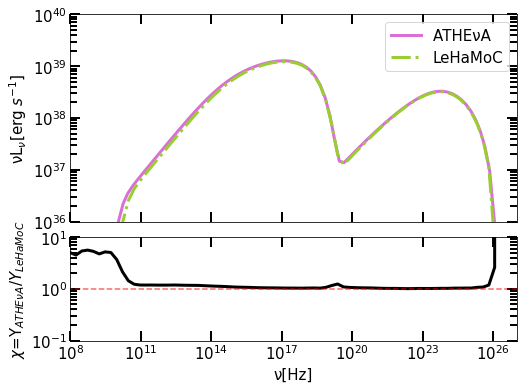

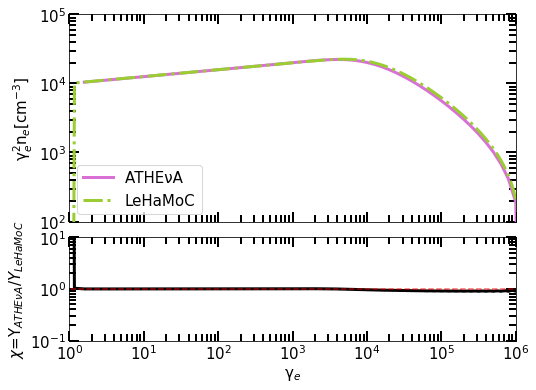

In [4]:
### Read Output files
## ATHEvA code results                
El_dis_s_cool_t1 = pd.read_csv("Test_1_el_dis_W_SSA.txt", names=["logx","logy"], sep="  ",  skiprows=0) 
t1_i_el = 110 
Ph_dis_s_cool_t1 = pd.read_fwf("Test_1_ph_dis_W_SSA.txt", names=["logx","logy","logl1"], sep='\s+',  skiprows=0) 
t1_i_ph = 123

## LeMoC code results
El_dis_lemoc_t1 = pd.read_csv("Pairs_Distribution.txt", names=["logx","logy"], sep=" ",  skiprows=0) 
Ph_dis_lemoc_t1 = pd.read_csv("Photons_Distribution.txt", names=["logx","logy"], sep=" ",  skiprows=0) 
# Plots showing final snapshot (steady state)
# Select final snapshot from ATHEvA results
i = 11
g_el_t1 = np.array(10**(El_dis_s_cool_t1["logx"][i*t1_i_el+1 :(i+1)*t1_i_el-1]))
N_el_t1 = np.array(10.**(El_dis_s_cool_t1["logy"][i*t1_i_el+1:(i+1)*t1_i_el-1]))/(sigmaT*R0)

nu_t1 = np.array(10**(Ph_dis_s_cool_t1["logx"][i*t1_i_ph+1 :(i+1)*t1_i_ph-1]))*m_el*c**2./h
nu_L_nu_t1 = np.array(10**(Ph_dis_s_cool_t1["logy"][i*t1_i_ph+1 :(i+1)*t1_i_ph-1]))*4.*np.pi/3.*(R0)*m_el*c**3./sigmaT

# Select final snapshot from LeHaMoC results
iplot = int(time_end/step_alg)
nu_tot = np.array(10**Ph_dis_lemoc_t1["logx"][(iplot-1)*int(grid_nu):iplot*int(grid_nu)])
Spec_temp_tot = np.array(10**Ph_dis_lemoc_t1["logy"][(iplot-1)*int(grid_nu):iplot*int(grid_nu)])
g_el  = np.array(10**El_dis_lemoc_t1["logx"][(iplot-1)*int(grid_g_el):iplot*int(grid_g_el)])
N_el  = np.array(10**El_dis_lemoc_t1["logy"][(iplot-1)*int(grid_g_el):iplot*int(grid_g_el)])

#Plotting of the results
plotting_res_1(nu_t1,nu_L_nu_t1,nu_tot,Spec_temp_tot,'νL$_{ν}$[erg $s^{-1}$]',"ν[Hz]",10**8.,10**27.,10**(36.),10**40.,"AΤΗΕνΑ","LeHaMoC","test1_ph.png")
plotting_res_1(g_el_t1,N_el_t1,g_el,g_el**2.*N_el,'γ$_e^2$n$_e$[cm$^{-3}$]',"γ$_{e}$",10**0.,10**6.,10**(2.),10**(5.),"AΤΗΕνΑ","LeHaMoC","test1_el.png")

In [5]:
# Function for interpolating the first integral of the Bethe-Heitler pair emissivity (see Eq. A.21 in Stathopoulos et al. 2023)
intrp_cs_m, intrp_cs_p, max_intrp_cs_m, max_intrp_cs_p = f.interp_cs_BH_int(np.logspace(0., 8., 50), np.logspace(0., 10., 50), 10**7., 10**35.)

# Read the spectrum of the protons from the ATHEνΑ code
pr_spec = pd.read_csv("pr_spec_E_p24_C_C.txt", names=["logx", "logy"], sep="	",  skiprows=0)

# Read the target photon field
ph_spec = pd.read_csv("ph_spec_E_p24_C_C.txt", names=["logx", "logy"], sep="	",  skiprows=0)

# Read the pair spectrum produced by the photopion process in the ATHEνΑ code
el_spec_pg = pd.read_csv("el_spec_E_p24_C_C.txt", names=["logx", "logy"], sep="	",  skiprows=0)

# Read the pair spectrum produced by the Bethe-Heitler process in the ATHEνΑ code
bh_spec = pd.read_csv("BH_spec_E_p24_C_C.txt", names=["logx", "logy"], sep="	",  skiprows=0)

# Read the photon spectrum produced by the photopion process in the ATHEνΑ code
ph_spec_p0 = pd.read_csv("pi0_spec_E_p24_C_C.txt", names=["logx", "logy"], sep="	",  skiprows=0)

# Read the neutrino spectrum produced by the photopion process in the ATHEνΑ code
neutrino_spec = pd.read_csv("nu_spec_E_p24_C_C.txt", names=["logx", "logy"], sep="	",  skiprows=0)

# Arrays and grids initialization
g_pr = np.array(10**(pr_spec.logx))  # Proton Lorentz factor grid
N_pr = np.array(10.**(pr_spec.logy)) / (g_pr**2.)  # Number density of the protons
g_el = np.array(10**(el_spec_pg.logx))  # Pairs Lorentz factor grid
x_bb = np.array(10**(ph_spec.logx))
nu_ic = x_bb * m_el * c**2. / h  # Frequency grid
photons_bb = np.array(10**(ph_spec.logy)) / (x_bb**2.) * h / (m_el * c**2.)  # Photons grid
E_nu_space = np.logspace(10., 22., 50) * eV  # Neutrino  energies grid
R0 = 10**15.  # Assumed radius of the source

/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:343: RuntimeWarning: invalid value encountered in log10
  E_array = np.logspace(np.log10(E_min),np.log10(w_rand-1.))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:309: RuntimeWarning: divide by zero encountered in reciprocal
  y_plus = p_p**(-1.)*np.log((E_p+p_p)/(E_p-p_p))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:309: RuntimeWarning: invalid value encountered in multiply
  y_plus = p_p**(-1.)*np.log((E_p+p_p)/(E_p-p_p))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:317: RuntimeWarning: invalid value encountered in arccos
  return 3./(8.*np.pi*137.)*sigmaT*p_p*p_/k**3.*(-4.*(np.sin(np.arccos(cos_th_)))**2.*(2.*E_**2.+1.)/(p_**2.*D_**4.)+(5.*E_**2.-2.*E_*E_p+3.)/(p_**2.*D_**2.)+(p_**2.-k**2.)/(T**2.*D_**2.)+2.*E_p/(p_**2.*D_)+
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:318: RuntimeWarning: invalid value encountered in tr

/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:557: RuntimeWarning: divide by zero encountered in double_scalars
  Phi_g_temp.append(B_e_nu*np.exp(-s_e_nu*np.log(x/x_p_minus)**d_e_nu)*np.log(2./(1+y**2.))**(psi))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:606: RuntimeWarning: divide by zero encountered in double_scalars
  Phi_g_temp.append(B_e*np.exp(-s_e*np.log(x/x_p_minus)**d_e)*np.log(2./(1+y**2.))**(psi))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:606: RuntimeWarning: invalid value encountered in log
  Phi_g_temp.append(B_e*np.exp(-s_e*np.log(x/x_p_minus)**d_e)*np.log(2./(1+y**2.))**(psi))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:529: RuntimeWarning: divide by zero encountered in double_scalars
  Phi_g_temp.append(B_g*np.exp(-s_g*np.log(x/x_p_minus)**d_g)*np.log(2./(1+y**2.))**(psi))
/home/sis/Desktop/General/PhD/LeHaMoC + pp interactions/LeHaMoC_f.py:581: RuntimeWarning: divide by

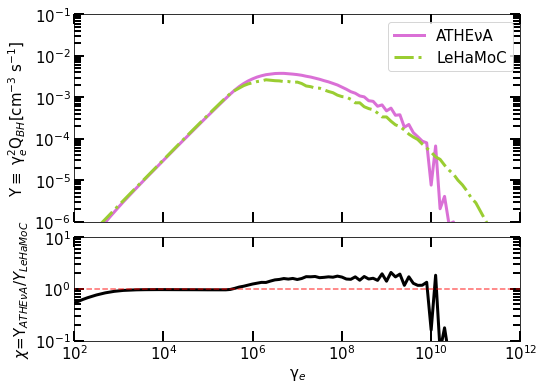

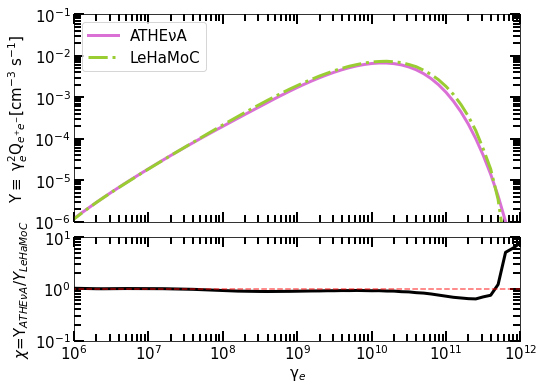

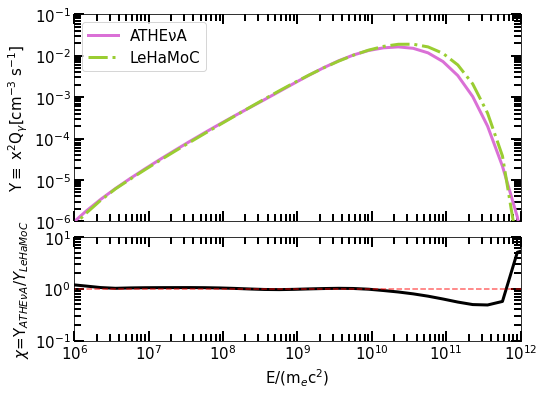

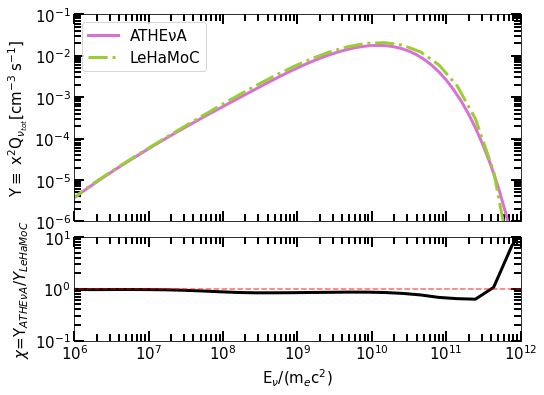

In [6]:
# Emissivities for Test 2 calculated with LeHaMoC
Q_BH_t2 = np.multiply(f.Q_BH_sol(g_el,g_pr,N_pr,nu_ic*h/(m_el*c**2.),np.array(photons_bb),intrp_cs_m,intrp_cs_p,max_intrp_cs_m,max_intrp_cs_p),1.)[1:-1]
Q_pg_pi_t2 = f.Qp_g_opt(g_el,nu_ic,N_pr,g_pr,photons_bb,x_bb*m_el*c**2./h,"e+")[1:-1]+f.Qp_g_opt(g_el,nu_ic,N_pr,g_pr,photons_bb,x_bb*m_el*c**2./h,"e-")[1:-1]
Q_pg_pi0_t2 = f.Qp_g_opt(g_el,nu_ic,N_pr,g_pr,photons_bb,x_bb*m_el*c**2./h,"2_g")[:-1] 
Q_pg_nu_t2 = (f.Qp_g_opt(g_el,nu_ic,N_pr,g_pr,photons_bb,x_bb*m_el*c**2./h,"nu_mu")+f.Qp_g_opt(g_el,nu_ic,N_pr,g_pr,photons_bb,x_bb*m_el*c**2./h,"\bar_nu_mu")+f.Qp_g_opt(g_el,nu_ic,N_pr,g_pr,photons_bb,x_bb*m_el*c**2./h,"nu_e")+f.Qp_g_opt(g_el,nu_ic,N_pr,g_pr,photons_bb,x_bb*m_el*c**2./h,"\bar_nu_e"))[1:-1]

# Plotting of the results
plotting_res_1(g_el,10**np.array(bh_spec.logy),g_el[1:-1],g_el[1:-1]**2.*Q_BH_t2,"Y$\equiv$ γ$_e^2$Q$_{BH}$[cm$^{-3}$ s$^{-1}$]","γ$_{e}$",10**2.,10**12.,10**(-6.),10**(-1.),"ATHEνA","LeHaMoC","test2_Q_BH.png")
plotting_res_1(10**np.array(el_spec_pg.logx),10**np.array(el_spec_pg.logy),g_el[1:-1],g_el[1:-1]**2.*Q_pg_pi_t2,"Y$\equiv$ γ$_e^2$Q$_{e^{+}e^{-}}$[cm$^{-3}$ s$^{-1}$]","γ$_{e}$",10**6.,10**12.,10**(-6.),10**(-1.),"ATHEνA","LeHaMoC","test2_Q_pg.png")
plotting_res_1(10**np.array(ph_spec_p0.logx),10**np.array(ph_spec_p0.logy),h*nu_ic[:-1]/(m_el*c**2.),(h*nu_ic[:-1]**2./(m_el*c**2.))*Q_pg_pi0_t2,"Y$\equiv$ x$^2$Q$_{γ}$[cm$^{-3}$ s$^{-1}$]","E/(m$_e$c$^2$)",10**6.,10**12.,10**(-6.),10**(-1.),"ATHEνA","LeHaMoC","test2_Q_p0.png")
plotting_res_1(10**np.array(neutrino_spec.logx),10**np.array(neutrino_spec.logy)/(R0/c),E_nu_space[1:-1]/(m_el*c**2.),(E_nu_space[1:-1]**2./(m_el*c**2.))*Q_pg_nu_t2/h,"Y$\equiv$ x$^2$Q$_{ν_{tot}}$[cm$^{-3}$ s$^{-1}$]","E$_{ν}$/(m$_e$c$^2$)",10**6.,10**12.,10**(-6.),10**(-1.),"ATHEνA","LeHaMoC","test2_ν_spec.png")

#Test 3
time_init = 0.
time_end = 600.
step_alg = 2.
PL_inj = 1.
g_min_el = 0.
g_max_el = 4.1
g_el_PL_min = 3.
g_el_PL_max = 4.
grid_g_el = 400.
g_min_pr = 0.
g_max_pr = 2.
g_pr_PL_min = 0.
g_pr_PL_max = 2.
grid_g_pr = 20.
grid_nu = 100.
p_el = 2.01
L_el = 48.0
p_pr = 2.01
L_pr = 6.45008626383572
Vexp = 0.1
R0 = 13.
B0 = 10.
m = 0.
delta = 1.
inj_flag = 0.
Ad_l_flag = 1.
Syn_l_flag = 0.
Syn_emis_flag = 1.
IC_l_flag = 0.
IC_emis_flag = 0.
SSA_l_flag = 1.
gg_flag = 0.
pg_pi_l_flag = 0.
pg_pi_emis_flag = 0.
pg_BH_l_flag = 0.
pg_BH_emis_flag = 0.
n_H = 0.
pp_l_flag = 0.
pp_ee_emis_flag = 0.
pp_g_emis_flag = 0.
pp_nu_emis_flag = 0.
neutrino_flag = 0.
esc_flag_el = 1.
esc_flag_pr = 1.
BB_flag = 0.
temperature = 5.
GB_ext = 0.
PL_flag = 0.
dE_dV_ph = 0.
nu_min_ph = 0.
nu_max_ph = 0.
s_ph = 2.01
User_ph = 0.

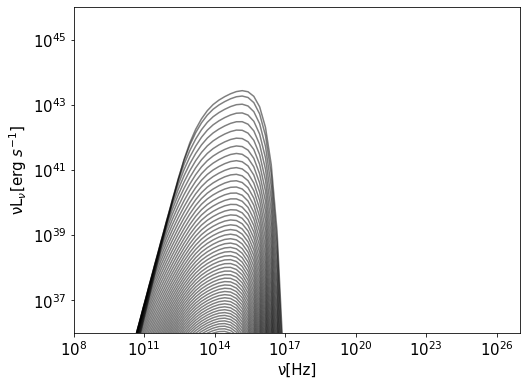

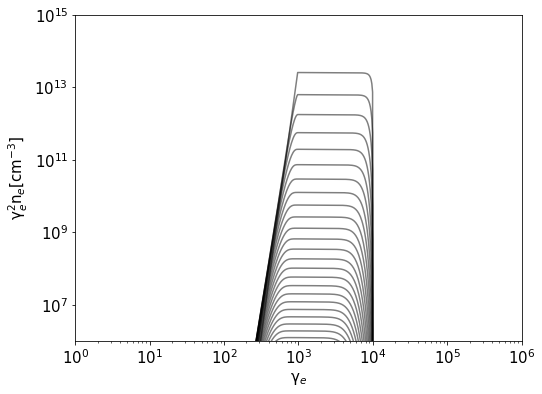

In [8]:
# Read Outpuf files
# LeHaMoC code results
El_dis_lemoc_t3 = pd.read_csv("Pairs_Distribution.txt", names=["logx","logy"], sep=" ",  skiprows=0) 
Ph_dis_lemoc_t3 = pd.read_csv("Photons_Distribution.txt", names=["logx","logy"], sep=" ",  skiprows=0) 

nu_tot = np.array(10**Ph_dis_lemoc_t3["logx"])
Spec_temp_tot = np.array(10**Ph_dis_lemoc_t3["logy"])/nu_tot**2.
g_el  = np.array(10**El_dis_lemoc_t3["logx"])
N_el  = np.array(10**El_dis_lemoc_t3["logy"])

# Plots showing time evolution
plotting_evol(nu_tot,Spec_temp_tot,int(grid_nu), 'νL$_{ν}$[erg $s^{-1}$]',"ν[Hz]",10**8.,10**27.,10**(36.),10**46.,"test1_ph_evol.png")
plotting_evol(g_el, N_el, int(grid_g_el),'γ$_e^2$n$_e$[cm$^{-3}$]',"γ$_{e}$",10**0.,10**6.,10**(6.),10**(15.),"test1_el_evol.png")

#Test 4
time_init = 0.
time_end = 10.
step_alg = 2.
PL_inj = 0.
g_min_el = 0.
g_max_el = 11.
g_el_PL_min = 0.
g_el_PL_max = 5.5
grid_g_el = 300
g_min_pr = 0.
g_max_pr = 8.
g_pr_PL_min = 0.
g_pr_PL_max = 6.93
grid_g_pr = 160
grid_nu = 100.
p_el = 2.01
L_el = 40.6
p_pr = 2.01
L_pr = 46.46
Vexp = 0.000000000000000003
R0 = 16.
B0 = 0.1
m = 0.
delta = 1.
inj_flag = 1.
Ad_l_flag = 1.
Syn_l_flag = 1.
Syn_emis_flag = 1.
IC_l_flag = 1.
IC_emis_flag = 1.
SSA_l_flag = 1.
gg_flag = 1.
pg_pi_l_flag = 1.
pg_pi_emis_flag = 1.
pg_BH_l_flag = 1.
pg_BH_emis_flag = 1.
n_H = 0.
pp_l_flag = 0.
pp_ee_emis_flag = 0.
pp_g_emis_flag = 0.
pp_nu_emis_flag = 0.
neutrino_flag = 1.
esc_flag_el = 1.
esc_flag_pr = 1.
BB_flag = 0.
temperature = 5.
GB_ext = 0.
PL_flag = 0.
dE_dV_ph = 0.
nu_min_ph = 0.
nu_max_ph = 0.
s_ph = 2.01
User_ph = 0.

/tmp/ipykernel_151974/2015208125.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fort810 = pd.read_csv("Photons_test_4_new.txt", names=["logx","logy","logc1"], sep="  ",  skiprows=0)
/tmp/ipykernel_151974/2934024620.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=1, hspace=0.1)
/home/sis/anaconda3/lib/python3.9/site-packages/numpy/ma/core.py:6849: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)
/tmp/ipykernel_151974/2934024620.py:5: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplo

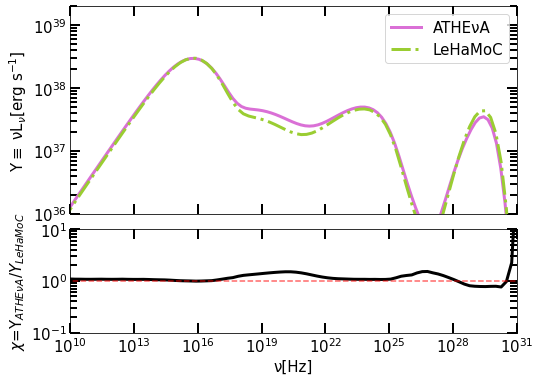

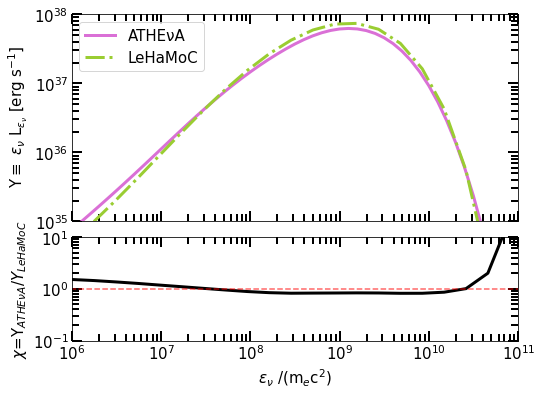

In [10]:
### Read Output files
## ATHEvA code results                
fort810 = pd.read_csv("Photons_test_4_new.txt", names=["logx","logy","logc1"], sep="  ",  skiprows=0)
neutrino_test4_new_Ath = pd.read_csv("neutrino_spec_obs_test4.txt", names=["logx","logy"], sep=" ",  skiprows=0)
# Select final snapshot from ATHEvA results
t4_i_ph = 128
i = 0
for i in range(10,11):
    nu_t4 = np.array(10**(fort810["logx"][(i+2)*t4_i_ph+1 :(i+3)*t4_i_ph-1]))*(m_el*c**2.)/h
    nu_L_nu_t4 = np.array(10.**(fort810["logy"][(i+2)*t4_i_ph+1:(i+3)*t4_i_ph-1]))*f.Volume(R0)*m_el*c**3./(R0**2.*sigmaT)
    
# LeHaMoC code results
Ph_dis_lemoc_t4 = pd.read_csv("Photons_Distribution.txt", names=["logx","logy"], sep=" ",  skiprows=0)
Nu_dis_lemoc_t4 = pd.read_csv("Neutrinos_Distribution.txt", names=["logx","logy"], sep=" ",  skiprows=0) 

# Plots showing final snapshot (steady state)

# Select final snapshot from LeMoC results
iplot = int(time_end/step_alg)

nu_tot = np.array(10**Ph_dis_lemoc_t4["logx"][(iplot-1)*int(grid_nu):iplot*int(grid_nu)])
Spec_temp_tot = np.array(10**Ph_dis_lemoc_t4["logy"][(iplot-1)*int(grid_nu):iplot*int(grid_nu)])

nu_nu = np.array(10**Nu_dis_lemoc_t4["logx"][(iplot-1)*50:iplot*50])
Nu_nu_plot = np.array(10**Nu_dis_lemoc_t4["logy"][(iplot-1)*50:iplot*50])

plotting_res_1(nu_t4,nu_L_nu_t4,nu_tot,Spec_temp_tot,'Y$\equiv$ νL$_{ν}$[erg s$^{-1}$]',"ν[Hz]",10**10.,10**31.,10**36.,2.*10**39.,"ATHEνA","LeHaMoC","test4.png")
plotting_res_1(10**np.array(neutrino_test4_new_Ath.logx)/30.*h/(m_el*c**2.),f.nuL_nu_obs(10**np.array(neutrino_test4_new_Ath.logy),44.4*10**6.,30.,R0),h*nu_nu[1:-1]/(m_el*c**2.),np.multiply(Nu_nu_plot[1:-1],(h*nu_nu[1:-1])**2./h)*4.*np.pi/3.*R0**2.*c/f.Volume(R0),' Y$\equiv$ $\epsilon_{ν}$ L$_{\epsilon_{ν} }$ [erg s$^{-1}$]',"$\epsilon_{ν}$ /(m$_e$c$^2$)",10**6.,10**11.,10**(35.),10**(38.),"ATHEνA","LeHaMoC","test4_neutrino.png")